# Numerical Simulation of Inflationary Dynamics

This notebook is intended to demonstrate the procedure of using our [code](https://github.com/bhattsiddharth/NumDynInflation) to compute the dynamics of the early universe during the period of inflation. Please read our [article](https://arxiv.org/abs/2212.00529) for a detailed explaination of the code along with the notation and quantities used before proceeding. 

## Introduction
This part of the notebook deals with the background dynamics of inflation as well as the first-order perturbations under the slow-roll approximation. These dynamics are governed by the following equations:
$$ H^2 \equiv \frac{1}{3m_p^2} \, \rho_{\phi} = \frac{1}{3m_p^2} \left[\frac{1}{2}{\dot\phi}^2 +V(\phi)\right] $$
$$ \dot{H} \equiv \frac{\ddot{a}}{a}-H^2 = -\frac{1}{2m_p^2}\, \dot{\phi}^2 $$
$$ {\ddot \phi}+ 3\, H {\dot \phi} + V_{,\phi}(\phi) = 0 $$

## Prerequisites
Before starting, we import all the required packages for the mathematical operations as well as formatting and plotting results:

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.ticker import AutoMinorLocator

## Defining the model
Now we need to define the model of inflation being considered and studied. This involves defining the potential function of the inflaton $V(\phi)$ along with its derivatives and any constants or other quantities required. We consider the simple case of a quadratic potential:


In [6]:
# This term defines one unit of time [ T = t * m_p * S ] where t is the actual cosmic time
S = 5e-5 

# parameters used in the potential function
M = 5.9e-6 
v0 = 0.5*M**2

# dimensionless potential function and its derivatives
def f(x):
    return x**2

def dfdx(x):
    return 2*x

def d2fdx2(x):
    return 2

## Defining the system
In order to carry out numerical simulations, it is convenient to write down the dynamical equations in terms of dimensionless variables (which also ensures that we do not need to worry about keeping track of units). Furthermore, it is important to re-scale the time variable by
a factor S (as defined in the previous cell) which can be suitably chosen according to the energy scale of the dynamics. Our primary dimensionless variables are defined as
$$ T = \left( t \, m_p \right) \, S $$
$$ x = \frac{\phi}{m_p} $$
$$ y =  \left( \frac{\dot{\phi}}{m_p^{2}} \right) \, \frac{1}{S} $$
$$ z = \left( \frac{H}{ m_p} \right) \, \frac{1}{S} $$
$$ A = \left( a \, m_p \right) \, S $$
In terms of these variables, the dynamical equations (to be simulated) take the form:
$$ \frac{{\rm d}x}{{\rm d}T} = y $$ 
$$ \frac{{\rm d}y}{{\rm d}T} = -3 \, z \, y - \frac{v_0}{S^{2}} \,  f_{,x}(x)$$ 
$$ \frac{{\rm d}z}{{\rm d}T} = - \frac{1}{2} \, y^2 $$ 
$$ \frac{{\rm d}A}{{\rm d}T} = A \, z $$ 

To solve this system as an initial value problem, we provide initial conditions to our dimensionless quantities. It should be noted that the dynamics are, in general, highly sensetive to initial conditions. Please refer to our [article](https://arxiv.org/abs/2212.00529) for details.

In [10]:
xi = 17.5 
yi = 0 
zi = np.sqrt(yi**2/6 + (v0*f(xi)/(3*S**2))) 
Ai = 1e-3 

We can now define our system of ODEs and solve them using the odeint function from the [SciPy](https://docs.scipy.org/doc/scipy/) library

In [13]:
def sys(var, T):
    [x, y, z, A] = var
    dxdT = y
    dydT = -3*z*y - v0*dfdx(x)/S**2 
    dzdT = -0.5*y**2
    dAdT = A*z
    return [dxdT, dydT, dzdT, dAdT]

## Invoking the solver

In [16]:
# the period of time over which the system is integrated 
T = np.linspace(0, 1000, 100000)

sol = odeint(sys, [xi,yi,zi,Ai], T, rtol=3e-14, atol=2e-35, mxstep=900000000)
x, y, z, A = np.transpose(sol)
phi, phi_t, H = x, y*S, z*S #converting back to dimensional quantities

## Defining useful parameters
We now define certain derived quantities that provide important information and/or indication about the dynamics being studied. These are:
- The number of e-folds before the end of inflation: $N_e  = \log_e{\dfrac{a_{\rm end}}{a(t)}}=\int_{t}^{t_{\rm end}} H(t') dt'$
- The slow-roll parameters: $\epsilon_H = -\dfrac{\dot{H}}{H^2}=\dfrac{1}{2m_p^2}\dfrac{\dot{\phi}^2}{H^2}~,~~\eta_H = -\dfrac{\ddot{\phi}}{H\dot{\phi}}=\epsilon_H  + \dfrac{1}{2\epsilon_H} \, \dfrac{d\epsilon_H}{dN_e}$
- The power spectra of scalar and tensor fluctuations: $P_{\zeta} = \dfrac{1}{8\pi^2}\left(\dfrac{H}{m_p}\right)^2\dfrac{1}{\epsilon_H}~,~~P_T(k)  = \dfrac{2}{\pi^2} \left( \dfrac{H}{m_p} \right)^2$
- The scalar spectral tilt $n_s$: $n_s - 1 = 2\eta_H - 4\epsilon_H~$ and the tensor-to-scalar ratio: $r = 16\epsilon_H$

We write these in terms of our dimensionless quantities as:

In [19]:
N = np.log(A/Ai) # number of e-folds of expansion elapsed
Nt = 77.4859 # number of e-folds elapsed when inflation ends
Ne = Nt - N 

epsH = -(-z**2 + ((v0*f(x)/S**2 - y**2))/3)/z**2 # indicates whether the system is in a state of inflation
etaH = -(-3*z*y - v0*dfdx(x)/S**2)/(y*z) # gives the rate of change of epsH

ns = 1 + 2*etaH - 4*epsH # 
r = 16*epsH
Ps = (S*z)**2 / (8 * np.pi**2 * epsH)
Pt = 2*(S*z)**2 / (np.pi**2)

/tmp/ipykernel_26157/949844564.py:6: RuntimeWarning: divide by zero encountered in divide
  etaH = -(-3*z*y - v0*dfdx(x)/S**2)/(y*z) # gives the rate of change of epsH
/tmp/ipykernel_26157/949844564.py:10: RuntimeWarning: divide by zero encountered in divide
  Ps = (S*z)**2 / (8 * np.pi**2 * epsH)


## Results
Having done the necessary calculations, we now plot the evolution of various quantities and analyse their behaviour. We can also match their values with the corresponding observational data and adjust the values of model parameters as required.

### Check if inflation is occuring:
When the universe inflates, the number of e-folds (N) should increase rapidly with time. After the end of inflation, the universe undergoes deccelerated expansion and the growth of N slows down substantially.

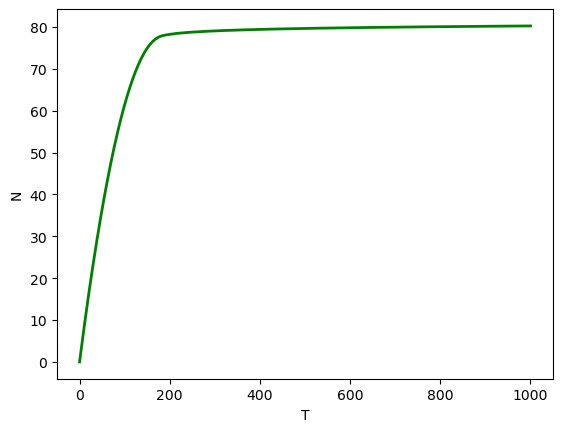

In [23]:
plt.plot(T,N,'g', lw=2)
plt.xlabel('T')
plt.ylabel('N')
plt.show()

We can see from the plot that the universe is inflating till about T=200

### Check if inflation is adequate:
The slow-roll parameter $\epsilon_H$ indicates that the universe is undergoing inflation when $\epsilon_H<1$. Hence, we can note the point at which its value crosses 1 as the end of inflation.

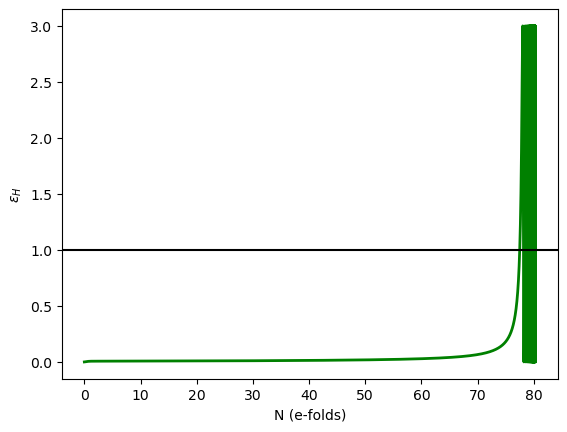

In [27]:
plt.plot(N,epsH, 'g', lw=2)
plt.axhline(1, color='black')
plt.xlabel('N (e-folds)')
plt.ylabel(r'$\epsilon_H$')
plt.show()

Here, the universe undergoes about 77 e-folds of accelerated expansion

### Matching the amplitude of power spectrum
We need to ensure that the value of power spectrum around the CMB pivot scale, as obtained from our computation, matches with the observed value from the latest CMB data (PLANCK 2018)

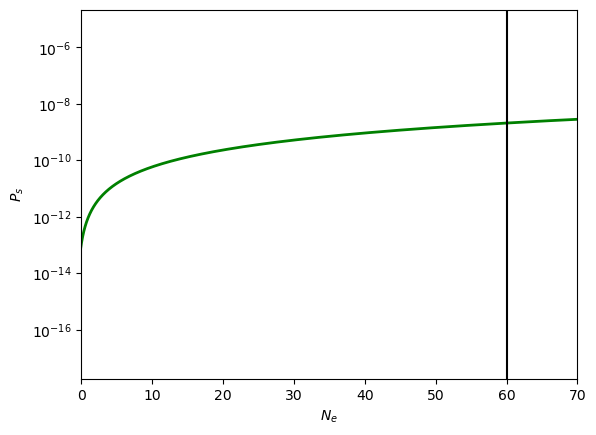

In [31]:
plt.plot(Ne,Ps, 'g', lw=2)
plt.axvline(60, color='black')
plt.yscale('log')
plt.xlim(0,70)
#plt.ylim(2e-9,2.4e-9)
plt.xlabel(r'$N_e$')
plt.ylabel(r'$P_s$')
plt.show()

The value of $P_s$ at $N_e=60$ should be approximately $2.1\times10^{-9}$. If this doesn't match, we should adjust the value of $v_0$ in the code 

### Phase behaviour

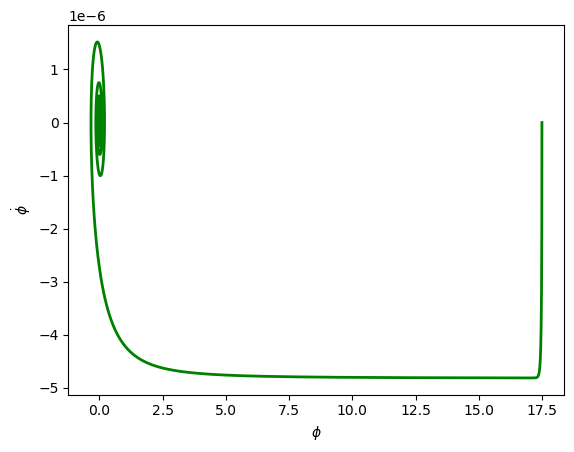

In [35]:
plt.plot(phi, phi_t, 'g', lw=2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot{\phi}$')
plt.show()